In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [3]:
import pandas as pd
import pyproj

In [4]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
from pathlib import Path

In [6]:
import joblib

In [7]:
from mt_function_yl import *

In [8]:
import seaborn as sn

### Data loading

In [9]:
# Curb extraction data
dfencv_all = pd.read_csv('/home/yelhe/script/mt/output/pseudo_crevall_new.csv')

In [10]:
dfencv_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      792 non-null    int64  
 1   mewmin  792 non-null    float64
 2   megmin  792 non-null    float64
 3   iemin   792 non-null    float64
 4   mewmax  792 non-null    float64
 5   megmax  792 non-null    float64
 6   iemax   792 non-null    float64
 7   mew     792 non-null    float64
 8   meg     792 non-null    float64
 9   ie      792 non-null    float64
 10  cmean   792 non-null    float64
 11  cmin    792 non-null    float64
 12  csum    792 non-null    float64
 13  cmax    792 non-null    float64
 14  cp      792 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 92.9 KB


In [14]:
dfrc = dfencv_all.copy(deep = True)

#### Preparation for regression model

##### Distribution check

In [15]:
import statsmodels.api as sm

##### Normal distribution test

In [16]:
from scipy import stats

In [17]:
from tabulate import tabulate

In [18]:
res_mew = stats.normaltest(dfrc['mew'])
res_mewmin = stats.normaltest(dfrc['mewmin'])
res_mewmax = stats.normaltest(dfrc['mewmax'])
res_meg = stats.normaltest(dfrc['meg'])
res_megmin = stats.normaltest(dfrc['megmin'])
res_megmax = stats.normaltest(dfrc['megmax'])
res_ie = stats.normaltest(dfrc['ie'])
res_iemin = stats.normaltest(dfrc['iemin'])
res_iemax = stats.normaltest(dfrc['iemax'])
res_cmean = stats.normaltest(dfrc['cmean'])
res_cmin = stats.normaltest(dfrc['cmin'])
res_cmax = stats.normaltest(dfrc['cmax'])

In [19]:
nt = [['','mew', 'meg', 'ie', 'cn'],
      ['var', res_mew.pvalue, res_meg.pvalue, res_ie.pvalue, res_cmean.pvalue],
      ['min', res_mewmin.pvalue, res_megmin.pvalue, res_iemin.pvalue, res_cmin.pvalue],
      ['max', res_mewmax.pvalue, res_megmax.pvalue, res_iemax.pvalue, res_cmax.pvalue]]

In [20]:
print(tabulate(nt))

---  ---------------------  ----------------------  ----------------------  ----------------------
     mew                    meg                     ie                      cn
var  4.994223075707969e-05  1.4321645432102403e-20  6.991578106095028e-58   6.2456308004455e-58
min  2.080787809979781e-09  3.705570346610361e-14   5.1302018115150566e-27  2.204786113087558e-264
max  0.0015673462492731055  1.3454614923234579e-31  2.46153348072214e-93    3.7369853514885445e-50
---  ---------------------  ----------------------  ----------------------  ----------------------


#### Regression analysis

##### Variables transformation

In [21]:
# Log transformation

In [22]:
# dflog = dfrc
# dflog = dflog.drop(['mewmin', 'megmin', 'iemin', 'mewmax',
#                     'megmax', 'iemax', 'mew', 'meg', 'ie', 
#                     'cmean', 'cmin', 'csum', 'cmax'], axis = 1)

In [23]:
# dflog['ie'] = np.log(dfrc['ie'] + 1)
# dflog['iemin'] = np.log(dfrc['iemin'] + 1)
# dflog['iemax'] = np.log(dfrc['iemax'] + 1)
# dflog['mew'] = np.log(dfrc['mew'] + 1)
# dflog['mewmin'] = np.log(dfrc['mewmin'] + 1)
# dflog['mewmax'] = np.log(dfrc['mewmax'] + 1)
# # variables meg, megmin, megmax include zeros
# dflog['meg'] = np.log(dfrc['meg'] + 1)
# dflog['megmin'] = np.log(dfrc['megmin'] + 1)
# dflog['megmax'] = np.log(dfrc['megmax'] + 1)
# # variables related number of curbs include zeros
# dflog['cmean'] = np.log(dfrc['cmean'] + 1)
# dflog['cmin'] = np.log(dfrc['cmin'] + 1)
# dflog['cmax'] = np.log(dfrc['cmax'] + 1)

In [24]:
# res_mew = stats.normaltest(dflog['mew'])
# res_mewmin = stats.normaltest(dflog['mewmin'])
# res_mewmax = stats.normaltest(dflog['mewmax'])
# res_meg = stats.normaltest(dflog['meg'])
# res_megmin = stats.normaltest(dflog['megmin'])
# res_megmax = stats.normaltest(dflog['megmax'])
# res_ie = stats.normaltest(dflog['ie'])
# res_iemin = stats.normaltest(dflog['iemin'])
# res_iemax = stats.normaltest(dflog['iemax'])
# res_cmean = stats.normaltest(dflog['cmean'])
# res_cmin = stats.normaltest(dflog['cmin'])
# res_cmax = stats.normaltest(dflog['cmax'])
# nt = [['','mew', 'meg', 'ie', 'cn'],
#       ['var', res_mew.pvalue, res_meg.pvalue, res_ie.pvalue, res_cmean.pvalue],
#       ['min', res_mewmin.pvalue, res_megmin.pvalue, res_iemin.pvalue, res_cmin.pvalue],
#       ['max', res_mewmax.pvalue, res_megmax.pvalue, res_iemax.pvalue, res_cmax.pvalue]]

In [25]:
# print(tabulate(nt))

In [26]:
# fig, axes = plt.subplots(ncols=4, nrows=3, sharex=True,figsize=(3*3, 2*3))
# sm.qqplot(dflog['mew'], line = '45', ax = axes[0,0])
# axes[0,0].set_title('mew')
# sm.qqplot(dflog['mewmin'], line = '45', ax = axes[1,0])
# axes[1,0].set_title('mewmin')
# sm.qqplot(dflog['mewmax'], line = '45', ax = axes[2,0])
# axes[2,0].set_title('mewmax')
# sm.qqplot(dflog['meg'], line = '45', ax = axes[0,1])
# axes[0,1].set_title('meg')
# sm.qqplot(dflog['megmin'], line = '45', ax = axes[1,1])
# axes[1,1].set_title('megmin')
# sm.qqplot(dflog['megmax'], line = '45', ax = axes[2,1])
# axes[2,1].set_title('megmax')
# sm.qqplot(dflog['ie'], line = '45', ax = axes[0,2])
# axes[0,2].set_title('ie')
# sm.qqplot(dflog['iemin'], line = '45', ax = axes[1,2])
# axes[1,2].set_title('iemin')
# sm.qqplot(dflog['iemax'], line = '45', ax = axes[2,2])
# axes[2,2].set_title('iemax')
# sm.qqplot(dflog['cmean'], line = '45', ax = axes[0,3])
# axes[0,3].set_title('cmean')
# sm.qqplot(dflog['cmin'], line = '45', ax = axes[1,3])
# axes[1,3].set_title('cmin')
# sm.qqplot(dflog['cmax'], line = '45', ax = axes[2,3])
# axes[2,3].set_title('cmax')
# plt.tight_layout()

Log transformation doesn't work well for this datasets.

In [27]:
# Cube root

In [28]:
# dfcube = dfrc
# dfcube = dfcube.drop(['mewmin', 'megmin', 'iemin', 'mewmax',
#                     'megmax', 'iemax', 'mew', 'meg', 'ie', 
#                     'cmean', 'cmin', 'csum', 'cmax'], axis = 1)
# dfcube['ie'] = np.cbrt(dfrc['ie'])
# dfcube['iemin'] = np.cbrt(dfrc['iemin'])
# dfcube['iemax'] = np.cbrt(dfrc['iemax'])
# dfcube['mew'] = np.cbrt(dfrc['mew'])
# dfcube['mewmin'] = np.cbrt(dfrc['mewmin'])
# dfcube['mewmax'] = np.cbrt(dfrc['mewmax'])
# # variables meg, megmin, megmax include zeros
# dfcube['meg'] = np.cbrt(dfrc['meg'])
# dfcube['megmin'] = np.cbrt(dfrc['megmin'])
# dfcube['megmax'] = np.cbrt(dfrc['megmax'])
# # variables related number of curbs include zeros
# dfcube['cmean'] = np.cbrt(dfrc['cmean'])
# dfcube['cmin'] = np.cbrt(dfrc['cmin'])
# dfcube['cmax'] = np.cbrt(dfrc['cmax'])

In [29]:
# res_mew = stats.normaltest(dfcube['mew'])
# res_mewmin = stats.normaltest(dfcube['mewmin'])
# res_mewmax = stats.normaltest(dfcube['mewmax'])
# res_meg = stats.normaltest(dfcube['meg'])
# res_megmin = stats.normaltest(dfcube['megmin'])
# res_megmax = stats.normaltest(dfcube['megmax'])
# res_ie = stats.normaltest(dfcube['ie'])
# res_iemin = stats.normaltest(dfcube['iemin'])
# res_iemax = stats.normaltest(dfcube['iemax'])
# res_cmean = stats.normaltest(dfcube['cmean'])
# res_cmin = stats.normaltest(dfcube['cmin'])
# res_cmax = stats.normaltest(dfcube['cmax'])
# nt = [['','mew', 'meg', 'ie', 'cn'],
#       ['var', res_mew.pvalue, res_meg.pvalue, res_ie.pvalue, res_cmean.pvalue],
#       ['min', res_mewmin.pvalue, res_megmin.pvalue, res_iemin.pvalue, res_cmin.pvalue],
#       ['max', res_mewmax.pvalue, res_megmax.pvalue, res_iemax.pvalue, res_cmax.pvalue]]
# print(tabulate(nt))

In [30]:
# fig, axes = plt.subplots(ncols=4, nrows=3, sharex=True,figsize=(3*3, 2*3))
# sm.qqplot(dfcube['mew'], line = '45', ax = axes[0,0])
# axes[0,0].set_title('mew')
# sm.qqplot(dfcube['mewmin'], line = '45', ax = axes[1,0])
# axes[1,0].set_title('mewmin')
# sm.qqplot(dfcube['mewmax'], line = '45', ax = axes[2,0])
# axes[2,0].set_title('mewmax')
# sm.qqplot(dfcube['meg'], line = '45', ax = axes[0,1])
# axes[0,1].set_title('meg')
# sm.qqplot(dfcube['megmin'], line = '45', ax = axes[1,1])
# axes[1,1].set_title('megmin')
# sm.qqplot(dfcube['megmax'], line = '45', ax = axes[2,1])
# axes[2,1].set_title('megmax')
# sm.qqplot(dfcube['ie'], line = '45', ax = axes[0,2])
# axes[0,2].set_title('ie')
# sm.qqplot(dfcube['iemin'], line = '45', ax = axes[1,2])
# axes[1,2].set_title('iemin')
# sm.qqplot(dfcube['iemax'], line = '45', ax = axes[2,2])
# axes[2,2].set_title('iemax')
# sm.qqplot(dfcube['cmean'], line = '45', ax = axes[0,3])
# axes[0,3].set_title('cmean')
# sm.qqplot(dfcube['cmin'], line = '45', ax = axes[1,3])
# axes[1,3].set_title('cmin')
# sm.qqplot(dfcube['cmax'], line = '45', ax = axes[2,3])
# axes[2,3].set_title('cmax')
# plt.tight_layout()

In [31]:
# Yeojohnson
dfyj = dfrc
dfyj = dfyj.drop(['mewmin', 'megmin', 'iemin', 'mewmax',
                    'megmax', 'iemax', 'mew', 'meg', 'ie', 
                    'cmean', 'cmin', 'csum', 'cmax'], axis = 1)
dfyj['ie'], l0 = stats.yeojohnson(dfrc['ie'])
dfyj['iemin'], l1 = stats.yeojohnson(dfrc['iemin'])
dfyj['iemax'], l2 = stats.yeojohnson(dfrc['iemax'])
dfyj['mew'], l3 = stats.yeojohnson(dfrc['mew'])
dfyj['mewmin'], l4 = stats.yeojohnson(dfrc['mewmin'])
dfyj['mewmax'], l5 = stats.yeojohnson(dfrc['mewmax'])
dfyj['meg'], l6 = stats.yeojohnson(dfrc['meg'])
dfyj['megmin'], l7 = stats.yeojohnson(dfrc['megmin'])
dfyj['megmax'], l8 = stats.yeojohnson(dfrc['megmax'])
dfyj['cmean'], l9 = stats.yeojohnson(dfrc['cmean'])
dfyj['cmin'], l10 = stats.yeojohnson(dfrc['cmin'])
dfyj['cmax'], l11 = stats.yeojohnson(dfrc['cmax'])

In [32]:
res_mew = stats.normaltest(dfyj['mew'])
res_mewmin = stats.normaltest(dfyj['mewmin'])
res_mewmax = stats.normaltest(dfyj['mewmax'])
res_meg = stats.normaltest(dfyj['meg'])
res_megmin = stats.normaltest(dfyj['megmin'])
res_megmax = stats.normaltest(dfyj['megmax'])
res_ie = stats.normaltest(dfyj['ie'])
res_iemin = stats.normaltest(dfyj['iemin'])
res_iemax = stats.normaltest(dfyj['iemax'])
res_cmean = stats.normaltest(dfyj['cmean'])
res_cmin = stats.normaltest(dfyj['cmin'])
res_cmax = stats.normaltest(dfyj['cmax'])
nt = [['','mew', 'meg', 'ie', 'cn'],
      ['var', res_mew.pvalue, res_meg.pvalue, res_ie.pvalue, res_cmean.pvalue],
      ['min', res_mewmin.pvalue, res_megmin.pvalue, res_iemin.pvalue, res_cmin.pvalue],
      ['max', res_mewmax.pvalue, res_megmax.pvalue, res_iemax.pvalue, res_cmax.pvalue]]
print(tabulate(nt))

---  -------------------  --------------------  ----------------------  ----------------------
     mew                  meg                   ie                      cn
var  0.5045297776444473   0.833953120864336     5.370609627891915e-28   0.0
min  0.20217661010898227  0.002235450320228197  1.0577882438944394e-30  2.204786113087558e-264
max  0.9548954381688688   0.5615918944759305    7.80336116043796e-26    0.0
---  -------------------  --------------------  ----------------------  ----------------------


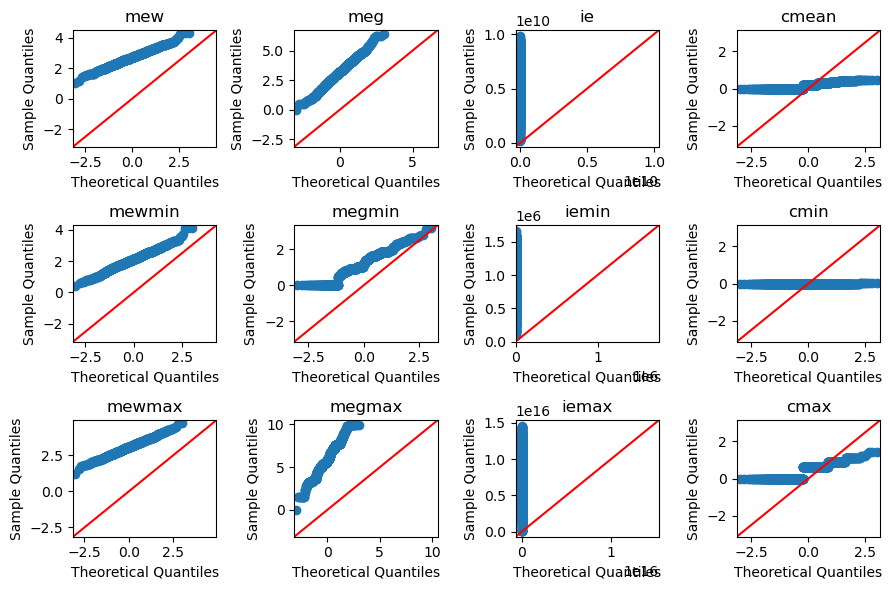

In [33]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(3*3, 2*3))
sm.qqplot(dfyj['mew'], line = '45', ax = axes[0,0])
axes[0,0].set_title('mew')
sm.qqplot(dfyj['mewmin'], line = '45', ax = axes[1,0])
axes[1,0].set_title('mewmin')
sm.qqplot(dfyj['mewmax'], line = '45', ax = axes[2,0])
axes[2,0].set_title('mewmax')
sm.qqplot(dfyj['meg'], line = '45', ax = axes[0,1])
axes[0,1].set_title('meg')
sm.qqplot(dfyj['megmin'], line = '45', ax = axes[1,1])
axes[1,1].set_title('megmin')
sm.qqplot(dfyj['megmax'], line = '45', ax = axes[2,1])
axes[2,1].set_title('megmax')
sm.qqplot(dfyj['ie'], line = '45', ax = axes[0,2])
axes[0,2].set_title('ie')
sm.qqplot(dfyj['iemin'], line = '45', ax = axes[1,2])
axes[1,2].set_title('iemin')
sm.qqplot(dfyj['iemax'], line = '45', ax = axes[2,2])
axes[2,2].set_title('iemax')
sm.qqplot(dfyj['cmean'], line = '45', ax = axes[0,3])
axes[0,3].set_title('cmean')
sm.qqplot(dfyj['cmin'], line = '45', ax = axes[1,3])
axes[1,3].set_title('cmin')
sm.qqplot(dfyj['cmax'], line = '45', ax = axes[2,3])
axes[2,3].set_title('cmax')
plt.tight_layout()

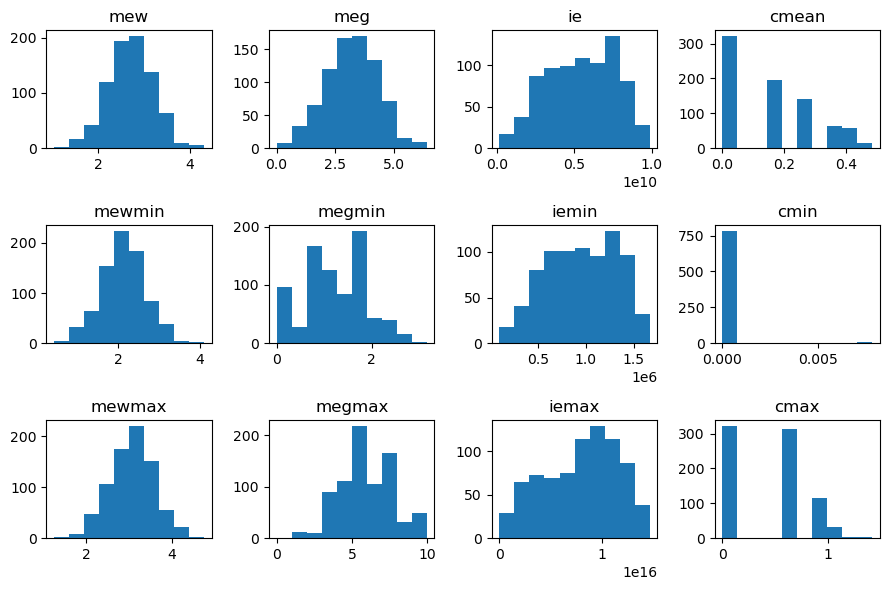

In [34]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(3*3, 2*3))
axes[0,0].hist(dfyj['mew'])
axes[0,0].set_title('mew')
axes[1,0].hist(dfyj['mewmin'])
axes[1,0].set_title('mewmin')
axes[2,0].hist(dfyj['mewmax'])
axes[2,0].set_title('mewmax')
axes[0,1].hist(dfyj['meg'])
axes[0,1].set_title('meg')
axes[1,1].hist(dfyj['megmin'])
axes[1,1].set_title('megmin')
axes[2,1].hist(dfyj['megmax'])
axes[2,1].set_title('megmax')
axes[0,2].hist(dfyj['ie'])
axes[0,2].set_title('ie')
axes[1,2].hist(dfyj['iemin'])
axes[1,2].set_title('iemin')
axes[2,2].hist(dfyj['iemax'])
axes[2,2].set_title('iemax')
axes[0,3].hist(dfyj['cmean'])
axes[0,3].set_title('cmean')
axes[1,3].hist(dfyj['cmin'])
axes[1,3].set_title('cmin')
axes[2,3].hist(dfyj['cmax'])
axes[2,3].set_title('cmax')
plt.tight_layout()

In [35]:
# Standardization

In [36]:
dfst = dfyj
dfst.columns

Index(['id', 'cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg',
       'megmin', 'megmax', 'cmean', 'cmin', 'cmax'],
      dtype='object')

In [37]:
dfst['ie'] = stats.zscore(dfyj['ie'])
dfst['iemin'] = stats.zscore(dfyj['iemin'])
dfst['iemax'] = stats.zscore(dfyj['iemax'])
dfst['mew'] = stats.zscore(dfyj['mew'])
dfst['mewmin'] = stats.zscore(dfyj['mewmin'])
dfst['mewmax'] = stats.zscore(dfyj['mewmax'])
dfst['meg'] = stats.zscore(dfyj['meg'])
dfst['megmin'] = stats.zscore(dfyj['megmin'])
dfst['megmax'] = stats.zscore(dfyj['megmax'])
dfst['cmean'] = stats.zscore(dfyj['cmean'])
dfst['cmin'] = stats.zscore(dfyj['cmin'])
dfst['cmax'] = stats.zscore(dfyj['cmax'])

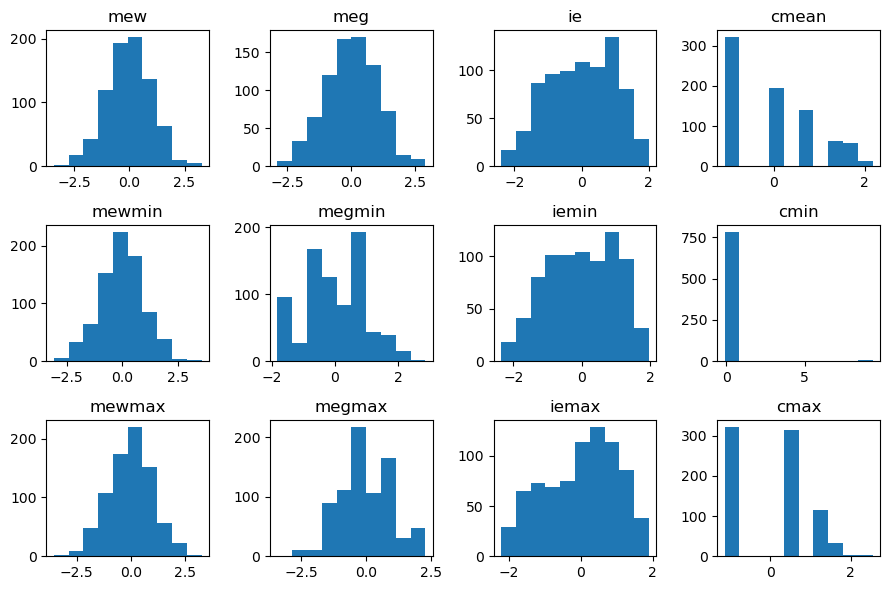

In [41]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(3*3, 2*3))
axes[0,0].hist(dfst['mew'])
axes[0,0].set_title('mew')
axes[1,0].hist(dfst['mewmin'])
axes[1,0].set_title('mewmin')
axes[2,0].hist(dfst['mewmax'])
axes[2,0].set_title('mewmax')
axes[0,1].hist(dfst['meg'])
axes[0,1].set_title('meg')
axes[1,1].hist(dfst['megmin'])
axes[1,1].set_title('megmin')
axes[2,1].hist(dfst['megmax'])
axes[2,1].set_title('megmax')
axes[0,2].hist(dfst['ie'])
axes[0,2].set_title('ie')
axes[1,2].hist(dfst['iemin'])
axes[1,2].set_title('iemin')
axes[2,2].hist(dfst['iemax'])
axes[2,2].set_title('iemax')
axes[0,3].hist(dfst['cmean'])
axes[0,3].set_title('cmean')
axes[1,3].hist(dfst['cmin'])
axes[1,3].set_title('cmin')
axes[2,3].hist(dfst['cmax'])
axes[2,3].set_title('cmax')
plt.tight_layout()

In [42]:
# Regression model preparation of accident points data, after normalization and standardization
dfst.to_csv('/home/yelhe/script/mt/output/pseudo_rm_norm_stan_rp.csv', index = False)

In [82]:
dfst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      295 non-null    int64  
 1   G       295 non-null    int64  
 2   SV      295 non-null    int64  
 3   LV      295 non-null    int64  
 4   pd      295 non-null    int64  
 5   cp      295 non-null    int64  
 6   ie      295 non-null    float64
 7   iemin   295 non-null    float64
 8   iemax   295 non-null    float64
 9   mew     295 non-null    float64
 10  mewmin  295 non-null    float64
 11  mewmax  295 non-null    float64
 12  meg     295 non-null    float64
 13  megmin  295 non-null    float64
 14  megmax  295 non-null    float64
 15  cmean   295 non-null    float64
 16  cmin    295 non-null    float64
 17  cmax    295 non-null    float64
dtypes: float64(12), int64(6)
memory usage: 41.6 KB


In [176]:
Y = dfst['SV']
X = dfst[['mew', 'mewmin', 'mewmax', 
          'meg','megmin','megmax', 
          'ie','iemin', 'iemax',
          'cmean','cmin','cmax', 'cp']]
X = sm.add_constant(X)
model1 = sm.OLS(Y, X)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     SV   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.412
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.153
Time:                        15:20:38   Log-Likelihood:                -117.67
No. Observations:                 295   AIC:                             263.3
Df Residuals:                     281   BIC:                             315.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7052      0.619      2.754      0.006       0.487       2.924
mew           -0.2333      0.658     -0.355      0.723      -1.528       1.061
mewmin         0.1771      0.311      0.569      0.570      -0.435       0.790
mewmax        -0.1505      0.399     -0.377      0.707      -0.937       0.636
meg            0.3001      0.321      0.935      0.351      -0.332       0.932
megmin        -0.1745      0.153     -1.144      0.254      -0.475       0.126
megmax         0.0542      0.209      0.259      0.796      -0.358       0.466
ie             1.4213      1.059      1.342      0.181      -0.663       3.505
iemin         -0.2511      0.483     -0.520      0.603      -1.201       0.699
iemax         -1.4722      0.654     -2.251      0.025      -2.760      -0.185
cmean         -0.1074      0.199     -0.539      0.590      -0.499       0.285
cmin           0.0340      0.258      0.132      0.895      -0.474       0.542
cmax           0.0587      0.097      0.607      0.544      -0.132       0.249
cp            -0.0487      0.085     -0.573      0.567      -0.216       0.118
==============================================================================
Omnibus:                       81.695   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.060
Skew:                           1.635   Prob(JB):                     3.17e-32
Kurtosis:                       4.056   Cond. No.                         518.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
Y = dfst['LV']
X = dfst[['mew', 'mewmin', 'mewmax', 
          'meg','megmin','megmax', 
          'ie','iemin', 'iemax',
          'cmean','cmin','cmax', 'cp']]
X = sm.add_constant(X)
model2 = sm.OLS(Y, X)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8796
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.575
Time:                        15:21:20   Log-Likelihood:                -229.57
No. Observations:                 295   AIC:                             487.1
Df Residuals:                     281   BIC:                             538.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6473      0.148      4.372      0.000       0.356       0.939
mew           -0.1398      0.161     -0.869      0.385      -0.456       0.177
mewmin         0.0367      0.106      0.346      0.730      -0.172       0.246
mewmax         0.0661      0.087      0.756      0.450      -0.106       0.238
meg           -0.0739      0.110     -0.672      0.502      -0.290       0.143
megmin         0.0708      0.080      0.888      0.375      -0.086       0.228
megmax        -0.0130      0.063     -0.205      0.838      -0.137       0.111
ie            -0.4169      0.287     -1.452      0.148      -0.982       0.148
iemin          0.2911      0.175      1.664      0.097      -0.053       0.636
iemax          0.2050      0.146      1.404      0.161      -0.082       0.492
cmean          0.1631      0.152      1.071      0.285      -0.137       0.463
cmin           0.0374      0.037      1.021      0.308      -0.035       0.109
cmax          -0.2653      0.214     -1.240      0.216      -0.686       0.156
cp             0.2536      0.285      0.891      0.374      -0.307       0.814
==============================================================================
Omnibus:                        1.394   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.467
Skew:                          -0.124   Prob(JB):                        0.480
Kurtosis:                       2.760   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
Y = dfst['pd']
X = dfst[['mew', 'mewmin', 'mewmax', 
          'meg','megmin','megmax', 
          'ie','iemin', 'iemax',
          'cmean','cmin','cmax', 'cp']]
X = sm.add_constant(X)
model3 = sm.OLS(Y, X)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2.480
Date:                Mon, 11 Mar 2024   Prob (F-statistic):            0.00325
Time:                        15:21:32   Log-Likelihood:                -2803.7
No. Observations:                 295   AIC:                             5635.
Df Residuals:                     281   BIC:                             5687.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1622.7731    912.249      1.779      0.076    -172.935    3418.482
mew         -346.1674    990.322     -0.350      0.727   -2295.558    1603.223
mewmin       121.1758    654.107      0.185      0.853   -1166.396    1408.747
mewmax       165.4135    538.561      0.307      0.759    -894.714    1225.541
meg        -2188.0187    677.470     -3.230      0.001   -3521.580    -854.458
megmin      1535.6111    491.057      3.127      0.002     568.994    2502.229
megmax      1393.1753    389.044      3.581      0.000     627.364    2158.986
ie         -4711.9335   1768.760     -2.664      0.008   -8193.636   -1230.231
iemin       1856.7703   1077.895      1.723      0.086    -265.004    3978.545
iemax       2753.7051    899.422      3.062      0.002     983.245    4524.165
cmean        -52.8961    937.693     -0.056      0.955   -1898.691    1792.899
cmin        -315.8545    225.461     -1.401      0.162    -759.661     127.952
cmax         416.7544   1318.134      0.316      0.752   -2177.916    3011.424
cp         -1129.5471   1753.201     -0.644      0.520   -4580.622    2321.528
==============================================================================
Omnibus:                      508.965   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           198703.019
Skew:                           9.448   Prob(JB):                         0.00
Kurtosis:                     128.732   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
Y = dfst['pd']
X = dfst[['meg','megmin','megmax', 
          'ie','iemin', 'iemax',
          'cp']]
X = sm.add_constant(X)
model4 = sm.OLS(Y, X)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     4.321
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           0.000144
Time:                        16:23:07   Log-Likelihood:                -2805.0
No. Observations:                 295   AIC:                             5626.
Df Residuals:                     287   BIC:                             5655.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1307.9760    284.476      4.598      0.000     748.052    1867.900
meg        -2232.5518    669.953     -3.332      0.001   -3551.196    -913.907
megmin      1536.5155    481.889      3.189      0.002     588.031    2485.000
megmax      1383.0584    385.258      3.590      0.000     624.769    2141.348
ie         -4312.3211   1729.492     -2.493      0.013   -7716.418    -908.224
iemin       1730.2084   1063.248      1.627      0.105    -362.544    3822.961
iemax       2453.5973    863.102      2.843      0.005     754.784    4152.410
cp          -510.4462    412.066     -1.239      0.216   -1321.501     300.609
==============================================================================
Omnibus:                      512.524   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           205905.999
Skew:                           9.574   Prob(JB):                         0.00
Kurtosis:                     131.004   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
Y = dfst['LV']
X = dfst[['meg', 'megmin', 'megmax', 
          'ie', 'iemin', 'iemax',
          'cp']]
X = sm.add_constant(X)
model5 = sm.OLS(Y, X)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9908
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.438
Time:                        16:24:02   Log-Likelihood:                -231.93
No. Observations:                 295   AIC:                             479.9
Df Residuals:                     287   BIC:                             509.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7608      0.046     16.415      0.000       0.670       0.852
meg           -0.0640      0.109     -0.586      0.558      -0.279       0.151
megmin         0.0520      0.079      0.662      0.509      -0.103       0.207
megmax        -0.0180      0.063     -0.287      0.774      -0.142       0.106
ie            -0.4700      0.282     -1.668      0.096      -1.025       0.085
iemin          0.3120      0.173      1.801      0.073      -0.029       0.653
iemax          0.2315      0.141      1.646      0.101      -0.045       0.508
cp             0.0304      0.067      0.452      0.652      -0.102       0.163
==============================================================================
Omnibus:                        0.953   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                1.065
Skew:                          -0.113   Prob(JB):                        0.587
Kurtosis:                       2.811   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

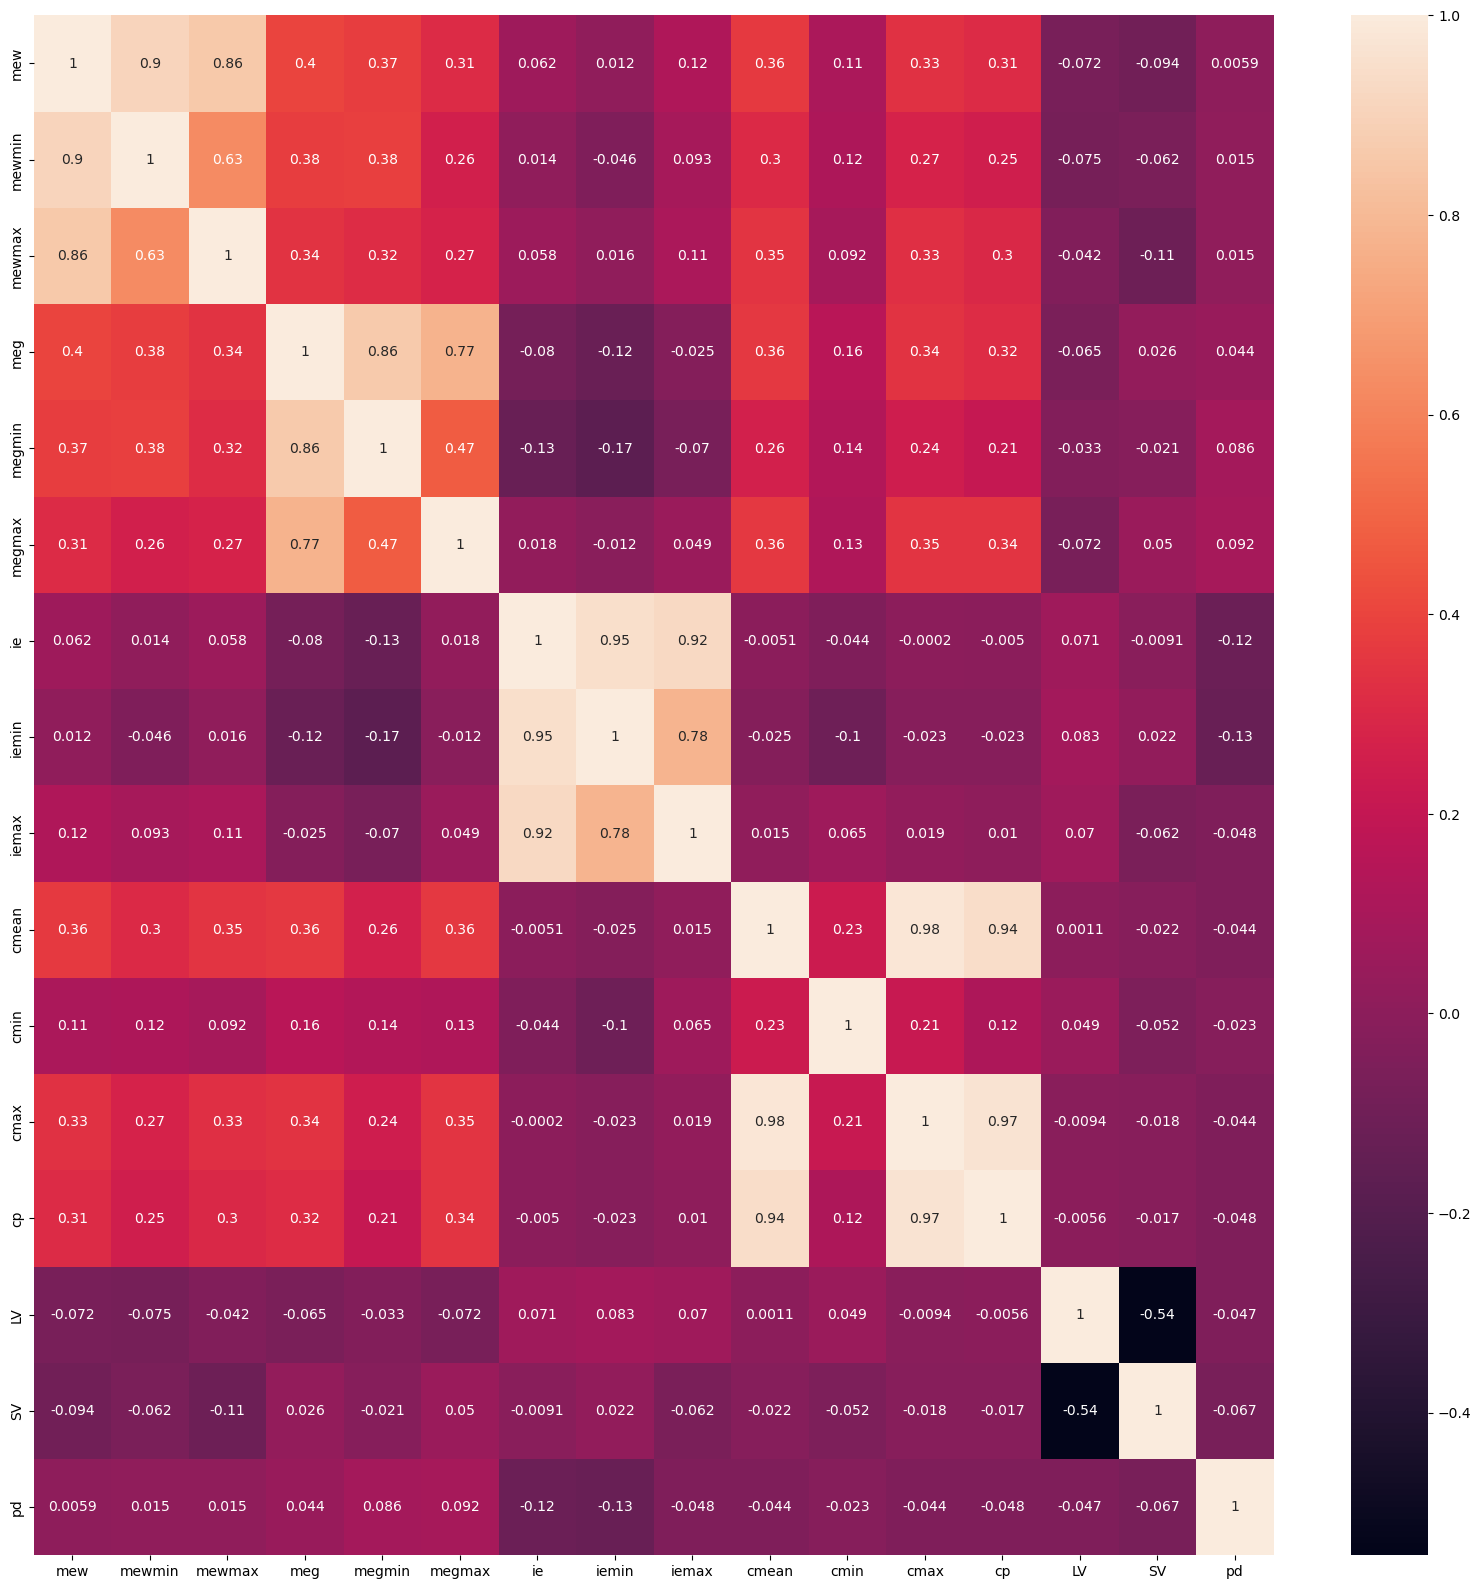

In [181]:
# vc
vc = dfst[['mew', 'mewmin', 'mewmax', 'meg','megmin','megmax', 'ie','iemin','iemax', 'cmean','cmin','cmax', 'cp', 'LV', 'SV',  'pd']]
corr_matrix = vc.corr()
plt.figure(figsize = (20,20))
sn.heatmap(corr_matrix, annot = True)
plt.show()

In [ ]:
#### Random forest to cross-validate which variables are important

In [228]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

In [198]:
dfst.columns

Index(['id', 'G', 'SV', 'LV', 'pd', 'cp', 'ie', 'iemin', 'iemax', 'mew',
       'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax'],
      dtype='object')

In [299]:
y1 = dfst['LV']
y2 = dfst['SV']
y3 = dfst['pd']
x = dfst[['meg','megmin','megmax', 
          'ie','iemin', 'iemax',
          'mew', 'mewmin', 'mewmax']]

In [300]:
##### For LV

In [301]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size = 0.25, random_state = 1)

In [302]:
rf1 = RandomForestRegressor(max_depth = 5, random_state = 1)
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)
# confusion_matrix_rf1 = metrics.confusion_matrix(y_test, y_pred_rf1)
# print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = rf1.predict(X_train)))
# print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred_rf1))
# cm_display_rf1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf1)
# cm_display_rf1.plot()

In [303]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_rf1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_rf1))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred_rf1, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred_rf1))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred_rf1))
print('Max Error:', metrics.max_error(y_test, y_pred_rf1))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred_rf1))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred_rf1))
print('R^2:', metrics.r2_score(y_test, y_pred_rf1))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred_rf1))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred_rf1))

Mean Absolute Error (MAE): 0.40909794377708797
Mean Squared Error (MSE): 0.2609791724154766
Root Mean Squared Error (RMSE): 0.5108612066065269
Mean Absolute Percentage Error (MAPE): 892878500907294.8
Explained Variance Score: -0.011119510814688427
Max Error: 1.242477781246192
Mean Squared Log Error: 0.1107135156787447
Median Absolute Error: 0.24559729813765296
R^2: -0.01140972975736032
Mean Poisson Deviance: 0.5282088695044266


Text(0, 0.5, 'feature')

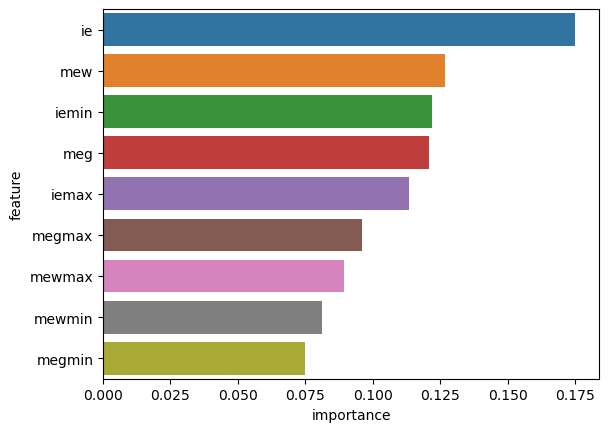

In [304]:
feature_name = list(x.columns.values.tolist())
importances = rf1.feature_importances_
df_rf1 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf1.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf1['importances'], y = df_rf1['features'])
plt.xlabel('importance')
plt.ylabel('feature')

In [1]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred_rf1, kind  = 'actual_vs_predicted')
plt.show()

NameError: name 'PredictionErrorDisplay' is not defined

In [306]:
##### For SV

In [307]:
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size = 0.25, random_state = 2)
rf2 = RandomForestRegressor(max_depth = 5, random_state = 2)
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_rf2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_rf2))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred_rf2, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred_rf2))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred_rf2))
print('Max Error:', metrics.max_error(y_test, y_pred_rf2))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred_rf2))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred_rf2))
print('R^2:', metrics.r2_score(y_test, y_pred_rf2))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred_rf2))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred_rf2))

Mean Absolute Error (MAE): 0.27119767413444
Mean Squared Error (MSE): 0.13931312473620058
Root Mean Squared Error (RMSE): 0.37324673439455647
Mean Absolute Percentage Error (MAPE): 742662657982445.4
Explained Variance Score: -0.2719100425697971
Max Error: 0.9457179506717027
Mean Squared Log Error: 0.07468329168315113
Median Absolute Error: 0.18199415184432227
R^2: -0.304066104368264
Mean Poisson Deviance: 0.6486060055717883


Text(0, 0.5, 'feature')

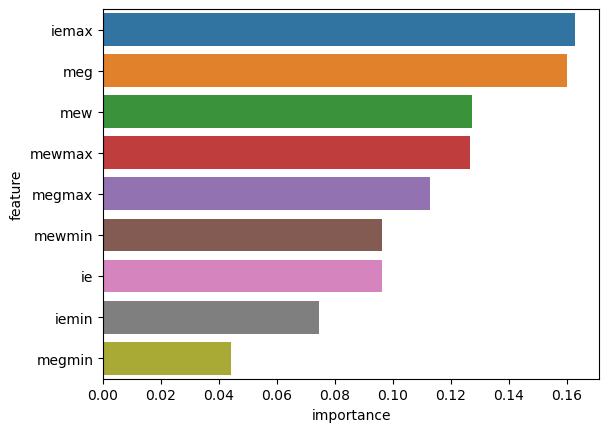

In [308]:
feature_name = list(x.columns.values.tolist())
importances = rf2.feature_importances_
df_rf2 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf2.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf2['importances'], y = df_rf2['features'])
plt.xlabel('importance')
plt.ylabel('feature')

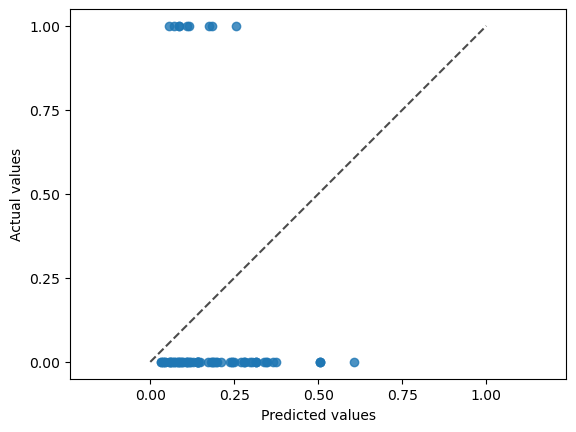

In [309]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred_rf2, kind  = 'actual_vs_predicted')
plt.show()

In [310]:
##### For pd

In [337]:
X_train, X_test, y_train, y_test = train_test_split(x, y3, test_size = 0.3, random_state = 3)
rf3 = RandomForestRegressor(n_estimators = 1000, random_state = 3)
rf3.fit(X_train, y_train)
y_pred_rf3 = rf3.predict(X_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred_rf3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred_rf3))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred_rf3, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, y_pred_rf3))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred_rf3))
print('Max Error:', metrics.max_error(y_test, y_pred_rf3))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred_rf3))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred_rf3))
print('R^2:', metrics.r2_score(y_test, y_pred_rf3))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_test, y_pred_rf3))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_test, y_pred_rf3))

Mean Absolute Error (MAE): 1627.9900433386838
Mean Squared Error (MSE): 6646588.183205712
Root Mean Squared Error (RMSE): 2578.0977838719987
Mean Absolute Percentage Error (MAPE): 2.677431749418544e+18
Explained Variance Score: -1.0178175725589127
Max Error: 10793.55
Mean Squared Log Error: 24.00416774589267
Median Absolute Error: 1018.318
R^2: -1.036059210389995
Mean Poisson Deviance: 3252.1096961333956


Text(0, 0.5, 'feature')

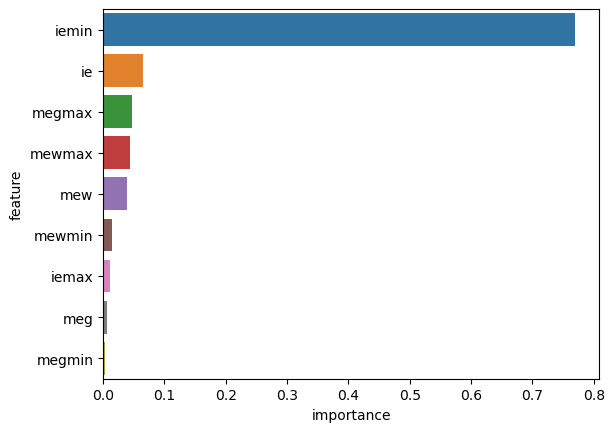

In [318]:
feature_name = list(x.columns.values.tolist())
importances = rf3.feature_importances_
df_rf3 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf3.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf3['importances'], y = df_rf3['features'])
plt.xlabel('importance')
plt.ylabel('feature')

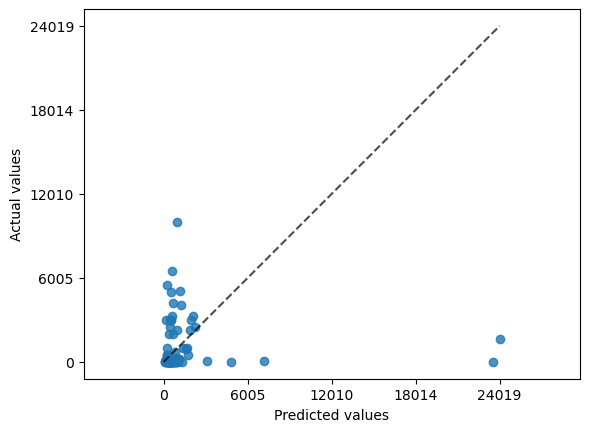

In [313]:
display = PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred_rf3, kind  = 'actual_vs_predicted')
plt.show()